# 文件下载<br>
网页中有很多媒体文件，我们有的时候需要下载它们。首先找到它们的位置，然后进行下载。有些图片是有单独的网址的，还有一些这是和当前网页公用一个根目录，因此它们的路径一般是不完整的。<br>
[莫烦的教程](https://morvanzhou.github.io/tutorials/data-manipulation/scraping/3-02-download/)<br>
点击图片，发现是第二种情况，然后open in new tab,容易找到图片的完整网址.
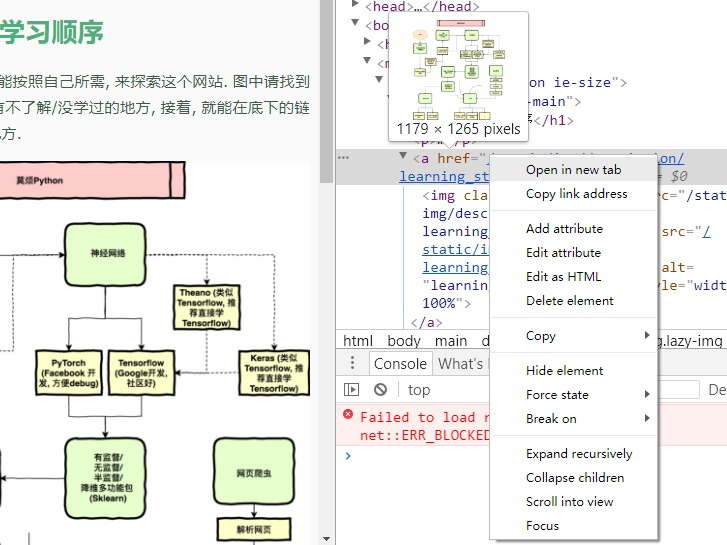

In [16]:
#以莫烦的图片为例
import os 
#os.makedirs(path路径, mode=0o777权限) 创建一个新的文件夹
path='C:/Users/js-wxyu/Desktop/imgdownload'
os.makedirs(path)
img_url='https://morvanzhou.github.io/static/img/description/learning_step_flowchart.png'

## urlretrieve函数_方法1<br>
retrieve:取回,获取<br>
urllib.request.retrieve(url, filename=None, reporthook=None, data=None)<br>
    Retrieve a URL into a temporary location on disk.远程获取文件的函数

In [ ]:
from urllib.request import urlretrieve
help(urlretrieve)

In [18]:
urlretrieve(img_url,path+'/learning_step.png')#下载并存放图片
music163_pic="http://p3.music.126.net/Du0lKpe2AUhUYHKAvokFlA==/877410278995009.jpg?param=50y50"
urlretrieve(music163_pic,path+'/Brain Crain.jpg')#mucis163上面的BrainCrain缩略图

('C:/Users/js-wxyu/Desktop/imgdownload/Brain Crain.jpg',
 <http.client.HTTPMessage at 0x227a97724a8>)

## requests_方法2<br>
requests是处理较大文件的好帮手,稍后会有显示.requests方法需要进行文件操作,即打开(创建)文件之后写入操作.<br>

In [20]:
import requests
img=requests.get(img_url)
with open(path+'/pic.jpg','wb') as f:#打开文件二进制写入
    f.write(img.content)
f.close()

In [24]:
#下载较大文件,利用chunk_size下载,下载一截保存一截,较大文件非常适用
help(img.iter_content)

Help on method iter_content in module requests.models:

iter_content(chunk_size=1, decode_unicode=False) method of requests.models.Response instance
    Iterates over the response data.  When stream=True is set on the
    request, this avoids reading the content at once into memory for
    large responses.  The chunk size is the number of bytes it should
    read into memory.  This is not necessarily the length of each item
    returned as decoding can take place.
    
    chunk_size must be of type int or None. A value of None will
    function differently depending on the value of `stream`.
    stream=True will read data as it arrives in whatever size the
    chunks are received. If stream=False, data is returned as
    a single chunk.
    
    If decode_unicode is True, content will be decoded using the best
    available encoding based on the response.



我们尝试着用它来下载一个MP3,不太清楚无损音质该如何下载,但是可以从media文件里轻易找寻到music的url<br>
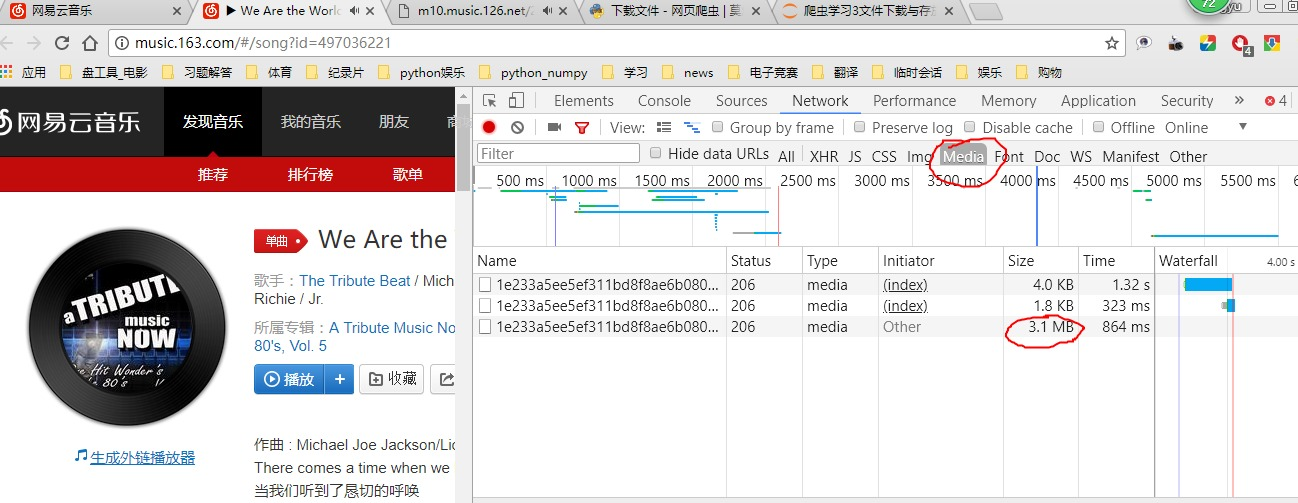

In [28]:
#download"We are the world.mp3' from 'http://music.163.com/#/song?id=497036221'
#music的目标网址

music_url="http://m10.music.126.net/20180405123251/b20a6f6352c6982619dbf3441888a2fd/ymusic/8289/fa6e/ae20/1e233a5ee5ef311bd8f8ae6b080b56aa.mp3"
music=requests.get(music_url)
#chunk_size循环下载,直到完成,占用较少的内存,更快
with open(path+'/wearetheworld.mp3','wb') as m:
    for chunk in music.iter_content(chunk_size=32):
        m.write(chunk)
m.close()

## pactice<br>
综合学习1,2,3的好些内容,进行批量式爬取,很多公益性质的网站的文件是很容易爬取的,这种理想信念值得我们时刻学习.所以就来容易一下.<br>
[美国国家地理中文网站](http://www.ngchina.com.cn/animals/)<br>
观察发现图片一般存放在img_list中,所以匹配"ul class='img_list'",然后寻找'img src=....'
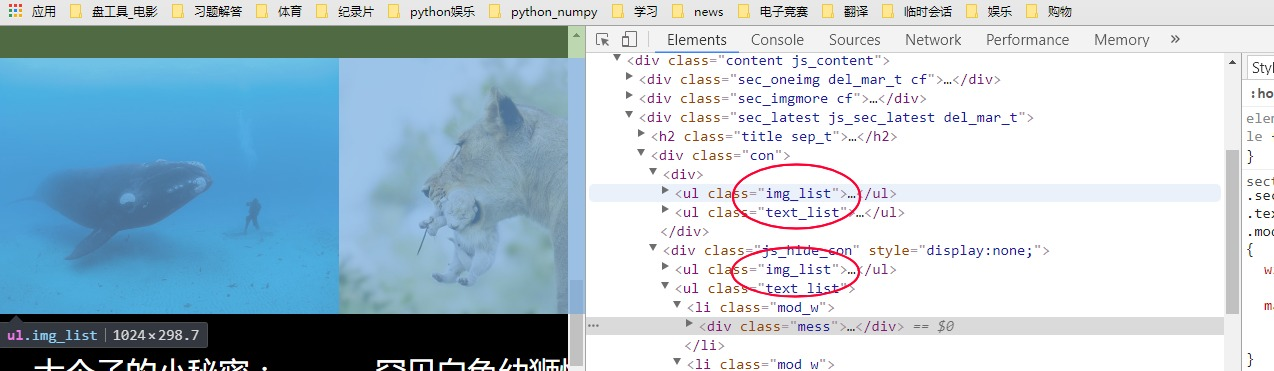

In [18]:
from bs4 import BeautifulSoup
import requests
import re
import os
path='C:/users/js-wxyu/Desktop/img_download'
try:
    os.makedirs(path)
except:
    print(path+'has been created')
url='http://www.ngchina.com.cn/animals/'
html=requests.get(url).text
#抓取网页内容,并soup
soup=BeautifulSoup(html,'lxml')
#匹配'ul',class_='img_list',见学习1
cla=soup.find_all('ul',class_='img_list')
#print(cla)
#注意到每个img_list包含多个图片
for i in cla:
    #用正则表达式匹配
    img_url=i.find_all('img',src=re.compile('http://image.ngchina.com.cn/.*?\.jpg'))
    for img in img_url:
        url=img['src']
        R=requests.get(url)
        #取图片后10位作为文件名,创建图片并写入
        with open(path+'/'+url[-10:],'wb')as f:
            f.write(R.content)
        f.close()            
#文件已经下载好!
#用os.startfile开启文件夹
try:
    os.startfile(path)
except:
    print('Error,cannot open target folder.')

C:/users/js-wxyu/Desktop/img_downloadhas been created
